# Accessing and plotting Phonon Density of States from the Materials Project

This notebook provides a guide to querying the MP and plotting phonon DOS

Relevant documentation:
* The pymatgen implementation of the Materials Project API [`pymatgen.ext.matproj`](https://pymatgen.org/pymatgen.ext.matproj.html#pymatgen.ext.matproj.MPRester.get_phonon_dos_by_material_id)
* The phonon module in pymatgen used to make the phonon DOS plots [`pymatgen.phonon`](https://pymatgen.org/pymatgen.phonon.html)

In [1]:
# Imports
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononDosPlotter
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.util.plotting import pretty_plot

In [2]:
# Use the MP API to access the phonon dos of Li3N (mp-2251)
with MPRester() as mpr:
    Li3N_dos=mpr.get_phonon_dos_by_material_id('mp-2251')

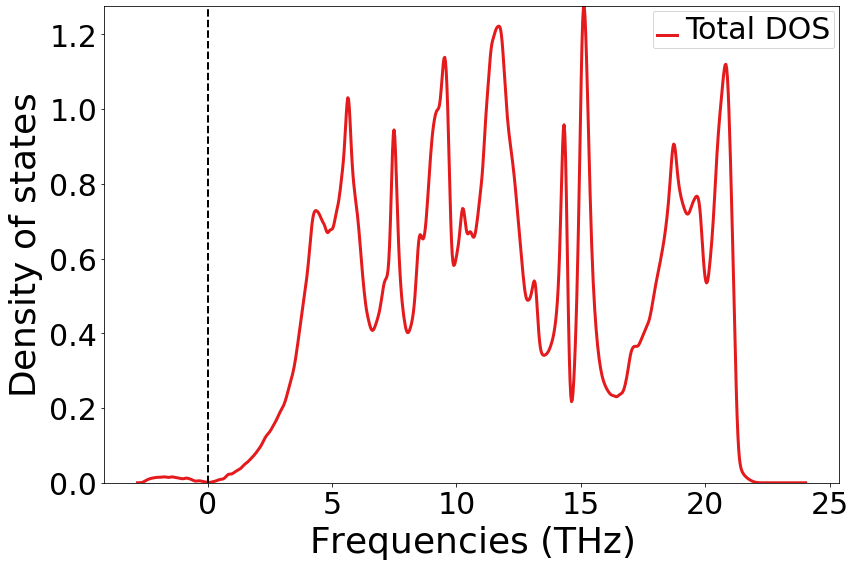

In [3]:
# Initialize the plotter
plotter=PhononDosPlotter()

#Add the Li3N DOS to the plotter object and show the plot
plotter.add_dos("Total DOS", Li3N_dos)
plotter.show()

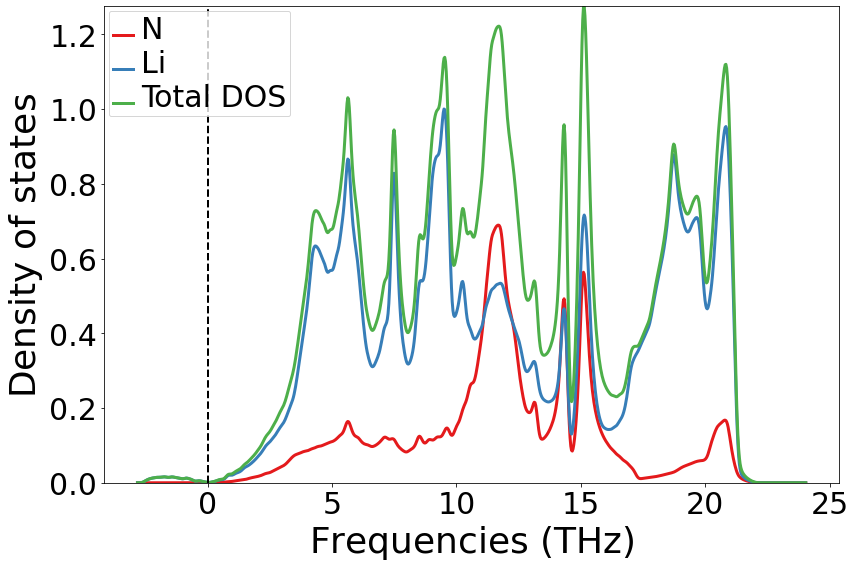

In [4]:
# We can also plot the elemental contributions to the phonon dos
el_dos = Li3N_dos.get_element_dos()
plotter.add_dos_dict(el_dos)
plotter.show()

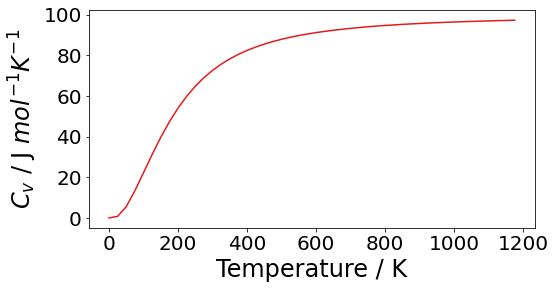

In [5]:
# We can plot the constant volume specific heat C_v against temperature

# Create an array of temperature values
T=np.arange(0,1200,25)

# Compute the heat capacity at each temperature
cv_array = np.array([Li3N_dos.cv(t) for t in list(T)])

# Make the plot
pretty_plot()
plt.xlabel("Temperature / K")
plt.ylabel("$C_{v}$ / J $mol^{-1} K^{-1}$")
plt.plot(T, cv_array)
plt.show()

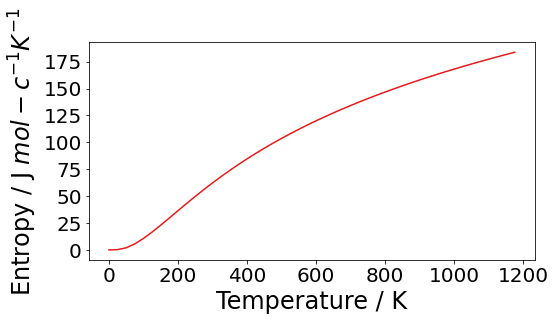

In [6]:
# We can also plot the entropy

S_array = np.array([Li3N_dos.entropy(t) for t in list(T)])

# Make the plot
pretty_plot()
plt.xlabel("Temperature / K")
plt.ylabel("Entropy / J $mol-c^{-1} K^{-1}$")
plt.plot(T, S_array)
plt.show()